# Exploratory Data Analysis for UofT occ_risk Dataset

In [1]:
#!pip install libraries
#!pip install seaborn
#!pip install bioinfokit
#!pip install statsmodels
#!pip install scikit_posthocs
#!pip install pingouin

In [2]:
#Libraries 
import pandas as occ_risk 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot

from sklearn.linear_model import LinearRegression

import statsmodels.api as sa
import statsmodels.formula.api as sfa
import scikit_posthocs as sp

import scipy
from scipy import stats

from bioinfokit.analys import stat


# Getting to Know Dataset

Importing and checking columns, rows, datatype, and dimension.

In [3]:
#Import csv file as pandas dataframe
occ_risk = occ_risk.read_csv('UofT_occupation_risk.csv')
occ_risk.head()

,code,occupation_risk
0,0,Low
1,1,High
2,2,Low
3,3,Low
4,4,Low


In [4]:
#Exploring data characteristics
occ_risk.describe()

,code
count,841.000000
mean,420.000000
std,242.920083
min,0.000000
25%,210.000000
50%,420.000000
75%,630.000000
max,840.000000


In [5]:
for col in occ_risk.columns: 
    print(col) 

code
occupation_risk


In [10]:
#Checking data types in dataframe
col_types = occ_risk.dtypes
col_types

code                int64
occupation_risk    object
dtype: object

In [7]:
#Checking dimensions of the dataframe
dims = occ_risk.shape
dims

(841, 2)

In [11]:
#Unique value counts for Code
code_freqs = occ_risk['code'].value_counts()
code_freqs

0      1
578    1
554    1
555    1
556    1
      ..
284    1
285    1
286    1
287    1
840    1
Name: code, Length: 841, dtype: int64

In [13]:
#Unique value counts for Occupation Risk
occupation_risk_freqs = occ_risk['occupation_risk'].value_counts()
occupation_risk_freqs

Low         629
High        167
Moderate     45
Name: occupation_risk, dtype: int64

# Data Cleaning

Cleaning occ_risk dataset using tidy data principles.

In [14]:
#Check for duplicates of the same values across attributes listed
dups = occ_risk.duplicated(['code', 'occupation_risk'])
occ_risk[dups]

,code,occupation_risk


In [15]:
occ_risk.isnull().values.any().sum()

0

In [16]:
#Calculate the number of missing values in each column:
occ_risk.isnull().sum()

code               0
occupation_risk    0
dtype: int64

<AxesSubplot:>

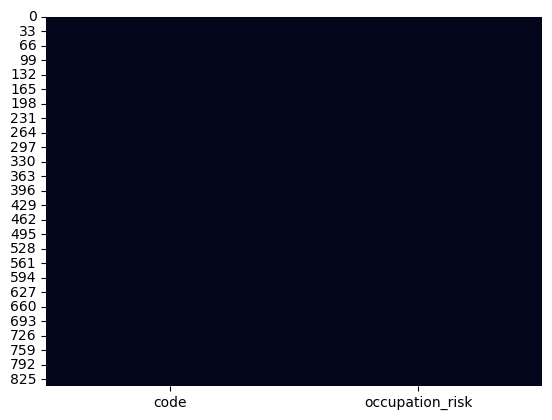

In [17]:
#Use a heatmap to visualize missing data
sns.heatmap(occ_risk.isnull(), cbar=False)

In [18]:
occ_risk.dropna()

,code,occupation_risk
0,0,Low
1,1,High
2,2,Low
3,3,Low
4,4,Low
...,...,...
836,836,Low
837,837,Low
838,838,Low
839,839,High


# One Hot Encoding

# Correlations

In [19]:
#Overview of all correlations between all pairs of numerical columns
occ_risk.corr()

,code
code,1.0


In [20]:
occ_risk.corr().style.background_gradient(cmap="Blues")

,code
code,1.000000
